# The Nash Equilibrium

## Learning goals:

After this week, the student will be able to:
- Understandy why vectors and arrays are important computational tools, and how they are implemented  
- Describe a 2x2 normal-form game
- Find pure strategy Nash equilibria
- Find mixed strategy equilibria of 2x2 normal-form games

## Arrays and Vectorization

You have already encountered lists and how they can be used for plotting earlier in this course. There exists, however, a more computationally efficient way to store data in Python, which makes the code both faster and easier to read and work with. This method is often referred to as *array computation* or *vectorized computation*, and is based on making use of a data structure called *arrays*. 

The array data structure is specifically made for computations, and all of their properties are embedded in a library called *NumPy*. To make use of this data structure and all the additional properties that it contains, one must first import this library to the Python-code. Typically, one imports the NumPy-library by writing the line 

```python 
import numpy as np
```

This line tells the computer to translate the abbreviation "np" as the NumPy-library. To access the functionalities of this library, one must therefore use this abbreviation. Below is an example of how the `array`-functionality in the NumPy-library can be used to translate a list of elements "l" into an array of the same elements.

In [ ]:
import numpy as np
l = ["a", "b", "c", "d"]
a = np.array(l)
print(type(l), type(a))

<class 'list'> <class 'numpy.ndarray'>


By importing the library this way, we are certain that we use the functions from this exact library, and not another library. Typically this is not a problem, but in some situations it may be of importance. An alternative way to import the library is to write 
```python
from numpy import *
```

which gives you access to all of the functionalities in the NumPy-library at once.

Similar to lists and nested lists, arrays can be both "one-dimensional" and "multi-dimensional". The one-dimensional array is just a sequence of elements, where each element can be reached by making use of one index. In the example below, the array "a" is one-dimensional. Each element in the array can be reached by writing `a[i]` in the code, where "i" can be any number from zero to the length of the array minus one. 

In [ ]:
import numpy as np

l = ["a", "b", 0, 1]
print(f"l = {l}")
print(f"l[0] = {type(l[0])}, l[-1] = {type(l[-1])}")

a = np.array(l)
print(f"a = {a}")
print(f"a[0] = {type(a[0])}, a[-1] = {type(a[-1])}")

l = ['a', 'b', 0, 1]
l[0] = <class 'str'>, l[-1] = <class 'int'>
a = ['a' 'b' '0' '1']
a[0] = <class 'numpy.str_'>, a[-1] = <class 'numpy.str_'>


The example above also illustrates an important difference between arrays and lists: When the elements of an array are admixtures of strings and integers, all elements are translated into strings. This is, however, not the case if all the elements in the array are integers to begin with; then all elements are interpreted as integers. 

For a multi-dimensional array, multiple indices are needed in order to reach each of the array's elements. An example of a multi-dimensional array is the two-dimensional one. The two-dimensional array can be viewed as a table of elements where the first index represents the rows and the second index represents the columns. In the example below a two-dimensional array with two rows and three columns is created.  

In [ ]:
import numpy as np
T = np.array([["a", "b", "c"], ["d", "e", "f"]])
print(T)

[['a' 'b' 'c']
 ['d' 'e' 'f']]


The first row of this array can be accessed by writing 

In [ ]:
first_row = T[0]
print(first_row)

['a' 'b' 'c']


where the index "0" refers to the first row. Similarily, the first column can be reached by writing 

In [ ]:
first_column = T[:,0]
print(first_column)

['a' 'd']


where the symbol `:` means "all elements". The slicing `:,0` is here read as taking the first element (`0`) from all the rows (`:`) in the array. This becomes the first column. Writing `1` instead of `0` in the code above yields the second column, and so on. Equivalently, one can also access the rows by writing `T[0,:]`, meaning the first element (`0`) of all the columns (`:`), but this is effectively the same as writing only `T[0]`. 

### Making arrays with linspace( ) and zeros( )

Making arrays from lists is a simple and intuitive way to create arrays. NumPy does, however, also contain some other functions that may ease the creation of arrays – especially when dealing with numbers. These functions are called `linspace` and `zeros`. The former function takes three arguments; a start point, an end point and the number of elements in the array. Making an array this way gives an evenly spaced sequence of the given number of elements, starting at the starting point and ending at the ending point. This is shown below. 

In [ ]:
from numpy import linspace
a = linspace(0, 10, 11)
print(a)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Here the array "a" consists of eleven evenly spaced points, starting from zero and ending at 10.

The function `zeros` takes one argument, being the shape of the array, and returns an array with zero as the elements and the shape given as argument. A one-dimensional array of "n" zeros can be made by writing 

In [ ]:
from numpy import zeros
n = 10
a = zeros(n)
print(a, len(a))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 10


which in the example above is an array of ten zeros, since "n" is here chosen to be equal to 10. Moreover, a two-dimensional array of zeros can be made by writing 

In [ ]:
from numpy import zeros, shape
n = 10
m = 2
a = zeros((n, m))
print("Two dimensional array:\n", a, "\n\nShape of array:\n", shape(a))

Two dimensional array:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

Shape of array:
 (10, 2)


In the example above we have created an array with ten rows and two columns. Using the NumPy-function `shape` enables us to easily find the shape of the array, as it returns a tuple with the number of rows as its first element, and the number of columns as its second element. 

### Why use arrays when we can use lists? 

There are good reasons for using arrays instead of lists when doing numerics. One reason is that arrays require less memory on the computer, thus letting the code run faster. Another reason is that arrays allow us to do the same operation on all of its elements at the same time, instead of looping over each element. For example, if we have an array of numbers from 0 to 10, but would like to change it to be an array with numbers from 0 to 20 instead, we can muliply the whole array by the number 2, doubling the value of each element of the array. This is illustrated in the example below. 

In [ ]:
import numpy as np

a = np.linspace(0, 10, 11)
print(a)

a_double = 2*a
print(a_double)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


---

### In-class exercises:

1. Make an array of 100 elements with numerical values ranging in increasing order from 1 to 100. Change the array so that its numerical values range from 1 to 50 instead, but still with 100 elements. What do you see?

2. Create an array with elements 1, 2, 3 and an array with elements 4, 5, 6. Multiply the two arrays with each other. Do the same operation on two lists instead. Do you get the same result for arrays and lists?

3. Make a list with elements 1, 2 and 3 as its first, second and third element respectively. Multiply this list with the number 2, and print the output. Now turn the original list into an array, and multiply this array by the number 2. Print the output. Do you get the same output in both cases? If not, which operation do you have to do on the list in order to get the same output as the output from the multiplication on the array? 

---

## Normal-form games and Nash Equlibria

Before this lecture you **must** have read:
- Chapter 1, The name of the game, p. 1-22 (For pure strategy Nash equilibria)
- Chapter 2, Chance, p. 22-29 (For mixed strategy Nash equilibria)

You are also encoraged to read (**these are the most exciting parts!**):
- Chapter 3, Time, p. 36-56 (For further discussion on Nash equilibria, including how one might misinterpret them)
- Chapter 4, Conventions, p. 57-70 (For discussion on conventions and social dilemmas)

In *Binmore, Ken. Game Theory : A Very Short Introduction. Vol. 173. Very Short Introductions. Oxford: Oxford University Press, 2007*

## The Pure Strategy Nash Equilibria Algorithm

When learning game theory, the most natural place to begin is with the concept of Nash equilibrium. Chapter 1 in Binmore covers what a Nash equilibrium is, but a video might work better for actually understanding the steps and motivation for finding a Nash equilibrium:

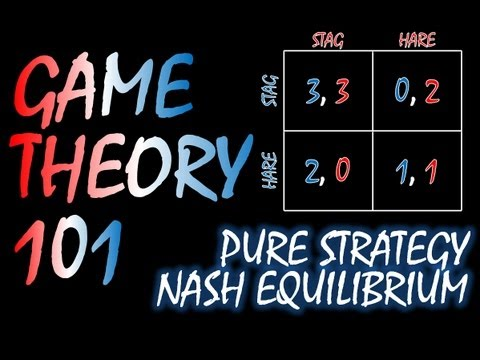

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('stzPcqmyhI4', width=800, height=300)

Now that you know what a Nash equilibrium is, it is time to practice finding them and then writing a Python program which can do it for us. One systematic way of finding Nash equilibria is outlined below:

First we consider Player 1's preferences:
 - Imagine that Player 2 chose left.
 - Put a circle in the top-left or bottom-left box, depending on which box has the higher payoff for Player 1.
 - If the payoffs are equal, put a circle in both boxes.
 - Now imagine that Player 2 chose right and repeat the same steps (only with the top-right and bottom-right boxes).

![title](assets/Nash1.PNG)

Then we consider Player 2's preferences:
 - Imagine the Player 1 chose up.
 - Put a circle in the top-left or top-right box, depending on which box has the higher payoff for Player 2.
 - If the payoffs are equal, put a circle in both boxes.
 - Now imagine the Player 1 chose down and repeat the same steps.

![title](assets/Nash2.PNG)

The boxes with two circles represent pure strategy Nash equilibria. The boxes with one or zero circles do not.

### Exercises
**a)** Using pen and paper, find the pure strategy Nash equilibria of the games shown below. (See page 11 and 18 of the book for the solution to most of these).

**b)** Discuss whether all of these equilibria represent good strategies. What counts as a good strategy? Can a strategy which is not a Nash equilibria be a good strategy?


![title](assets/FourGames.png)

## Representing 2x2 games in python

Before we try implementing this algorithm in Python we need a way to represent the players, boxes and payoffs. We choose to use numpy arrays to hold the possible payoffs for each player.

In [8]:
import numpy as np

In [9]:
# Payoff matrices for the Prisoner's Dilemma
P1 = np.array([[-9, 0],
               [-10, -1]])

P2 = np.array([[-9, -10],
               [0, -1]])

When working with numpy arrays it is important to have a good handle on 2D indexing. The indexes are in the order **row-column** and start at 0. The top-right payoff for Player 2 is then found with the index `P2[0, 1]`.

In [3]:
print(P2[0, 1])

-10


### Exercises

**a)** Print the payoff for Player 1 in "Chicken" when the moves are speed-slow.

**b)** Print the payoff for Player 2 in "Chicken" when the moves are slow-slow.

## Implementing the 2x2 Pure Strategy Nash Equilibrium Algorithm

When we found pure strategy Nash equilibria by hand, we kept track of the number of circles in boxes. This approach can be implemented in Python by using an array which keeps track of the numbers of circles in each box (how many players have a certain box as their "preferred strategy").

In [89]:
circles = np.array([[0, 0],
                    [0, 0]])

If we then want to put a circle in the top-right box, we add 1 to to the top-right element of `circles`. In the stag hunt example we went through earlier, the array `circles` should look like

```
[[2, 0],
 [0, 2]]
```
when the algorithm is done, which we can interpret as the top left and bottom right boxes being Nash equilibria.


The first half of the algorithm, where we add circles depending on Player 1's preferences can be implemented like this:

In [90]:
for col in range(2): # If P2 chooses column 1, what does P1 prefer? What about column 2?
    if P1[0, col] >= P1[1, col]:
        circles[0, col] += 1
    if P1[1, col] >= P1[0, col]:
        circles[1, col] += 1

When considering the preferences of Player 1, we compare payoffs in column 1 and then in column 2. You can see that the payoffs of Player 2 plays no role here. Compare the code with the first half of the algorithm explained earlier:

![title](assets/Nash1.PNG)

### Exercises

**a)** Implement the second half of the algorithm where we add circles depending on the preferences of Player 2.

**b)** Write a function which takes the payoff arrays `P1` and `P2` as arguments and prints the filled `circles` array. The elements of `circles` which are 2 now represent pure strategy Nash equilibria. Test the function on the games you solved by hand earlier.

## The Mixed Strategy Nash Equilibria Algorithm

So far we have looked at pure strategy Nash equilibria, where each player plays one strategy each time when in an equilibrium. Now consider the game matching pennies:

Two players reveal their coin at the same time. The players choose whether to show heads or to show tails. If the coins match, Player 1 wins. If the coins don't match, Player 2 wins. The game matrix for matching pennies is:

![title](assets/MatchingPennies.PNG)

Try finding a pure strategy Nash equilibria for matching pennies, even try finding one using the program you wrote earlier. There is none! An important theorem in game theory called Nash's Theorem states, however, that all finite games must have at least one Nash equilibrium. So what gives?

While there is no pure strategy Nash eqilibrium for matching pennies, there is a **mixed strategy** Nash equilibrium. Consider if both players randomly chose heads or tails 50% of the time. How might then any one player change their strategy to improve their expected utility? They can't! They have no incentive to play heads more often or tails more often, since their opponent always plays heads or tails with equal probability anyway. Since they have no incentive to change their strategy, they are playing a Nash equilibrium.

Note that both players need to play heads or tails with equal probability, since if Player 1 played heads more often than he played tails, it would be beneficial for Player 2 to **change their strategy** to always playing tails.

Coming up with the 50/50 strategy in matching pennies seems simple enough, but what if we change the utilities a little?

![title](assets/WMatchingPennies.PNG)

Now, it is not so obvious how we find the mixed strategy Nash equilibrium. If, for instance, Player 1 plays heads and tails with equal probability, Player 2 will just want to play tails every time, which will make Player 1 want to only play tails, which will...

This video covers how the mixed strategy in matching pennies is a Nash equilibria in more detail:

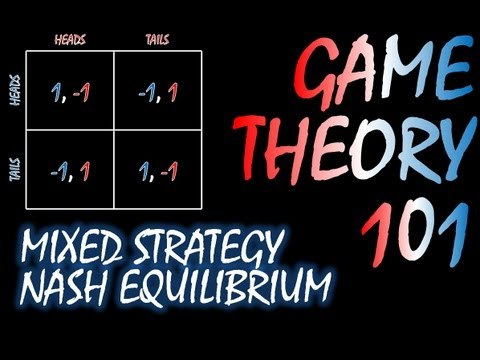

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('fvEQujUcPv4', width=800, height=300)

### How do we find mixed strategy Nash equilibria?

Finding a mixed strategy in a 2x2 game is more algebra than following a "proper" algorithm. The idea is to find what propability Player 1 must play up and down to make Player 2 indifferent between playing right and left. And vice versa. If both players have no incentive to change their strategy, they are playing a Nash equilibrium. To find which probabilities the players must have for playing their different strategies, we need to do some algebra.

We have a general game matrix:

![title](assets/Game.png)

We want the expected utility of Player 2 playing left $EU(L)$ to be the same as the expected utility of Player 2 playing right $EU(R)$, so that they are indifferent between playing left and right. These expected utilities depend on what Player 1 plays, so **we need to find the probabilities of player 1 playing up and down which makes Player 2 indifferent**.

The probability of Player 1 playing up is $P(U)$ and the probability of player 1 playing down is $1 - P(U)$. The expected utility of Player 2 playing left is then:

$$
\begin{aligned}
EU(L) &= P(U) a_2 + (1 - P(U)) c_2
\end{aligned}
$$

And the expected utility of Player 2 playing right is then:

$$
\begin{aligned}
EU(R) &= P(U) b_2 + (1 - P(U)) d_2
\end{aligned}
$$

We wish to find the probability of Player 1 playing up $P(U)$ so that these expected utilities are equal. This gives us the equation

$$
\begin{aligned}
EU(L) &= EU(R) \\
P(U)  a_2 + (1 - P(U)) c_2 &= P(U) b_2 + (1 - P(U)) d_2 \\
\end{aligned}
$$

This equation has a solution

$$
\begin{aligned}
P(U) &= \frac{-c_2 + d_2}{a_2 - b_2 - c_2 + d_2}
\end{aligned}
$$

```{admonition} Step by step solution to the equation
:class: toggle
There are no fancy tricks here, just moving numbers around until P(U) is on its own on the left hand side of the equation.

$$
\begin{aligned}
EU(L) &= EU(R) \\
P(U)  a_2 + (1 - P(U)) c_2 &= P(U) b_2 + (1 - P(U)) d_2 \\
P(U) a_2 + c2 - P(U) c2 &= P(U) b_2 + d2 - P(U) d_2 \\
P(U) a_2 - P(U) c_2 - P(U) b_2 + P(U) d_2 &= -c_2 + d_2 \\
P(U) (a_2 - b_2 - c_2 + d_2) &= -c_2 + d_2 \\
P(U) &= \frac{-c_2 + d_2}{a_2 - b_2 - c_2 + d_2}
\end{aligned}
$$

```

We now have an expression that gives us the probability of playing up in the mixed strategy that makes P2 indifferent between playing left and right. The probability of playing down is of course $1 - P(U)$. The probability of playing left and right that makes P1 indifferent between playing up and down can be found with the same method. After following the same steps for Player 2, we find that the probability of playing left $P(L)$ which makes Player 1 indifferent between playing up or down is

$$
\begin{aligned}
P(L) &= \frac{-b_1 + d_1}{a_1 - b_1 - c_1 + d_1}
\end{aligned}
$$

When P1 and P2 both play these strategies they are both indifferent between their choices, meaning they have no incentive to change their strategy, and they are playing a Nash equilibrium!

```{admonition} Setup of $P(L)$ equation
:class: toggle
The way we find the expression for $P(L)$ is completely equivelant to the way we found $P(U)$.

The expected utility of Player 1 playing up is:

$$
\begin{aligned}
EU(U) &= P(L) a_1 + (1 - P(L)) b_1
\end{aligned}
$$

And the expected utility of Player 1 playing down:

$$
\begin{aligned}
EU(D) &= P(L) c_1 + (1 - P(L)) d_1
\end{aligned}
$$

We wish to find the probability of Player 2 playing left $P(L)$ so that these expected utilities are equal. This gives us the equation

$$
\begin{aligned}
EU(U) &= EU(D) \\
P(L) a_1 + (1 - P(L)) b_1 &= EU(D) &= P(L) c_1 + (1 - P(L)) d_1 \\
\end{aligned}
$$

Which is again solved just by moving numbers around until $P(L)$ is alone on the left hand side of the equation.

```

**NOTE:** If the mixed strategy contains probabilities above 1 or below 0 you must discard it. You must also make sure you do not divide by zero inside the algorithm, as that will produce an error. This algorithm does not find eqilibria where one player plays a pure strategy and another plays a mixed strategy, though these can be found with the pure strategy algorithm: If two cells in the same row are pure strategy Nash equilibria, they also form an infinite number of mixed strategy Nash equilibra, since Player 1 can play only that row while Player 2 can play any mix of the two columns. This also applies the other way around. The final exercise below touches on this.

Since we have set these equations up with seperate named variables for each payoff, it can be convenient to create a variable for each payoff in our code. Moving the payoffs from the payoff arrays `P1` and `P2` onto seperate variables can be done like this:

In [10]:
a1, b1 = P1[0,0], P1[0,1]
c1, d1 = P1[1,0], P1[1,1]

a2, b2 = P2[0,0], P2[0,1]
c2, d2 = P2[1,0], P2[1,1]

This video covers the mixed strategy algorithm in more detail:

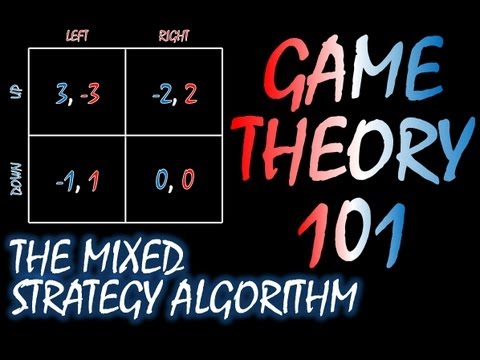

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('aa8USttcDoE', width=800, height=300)

### Exercises

**a)** Write a function which takes the payoff arrays `P1` and `P2` as arguments, creates a variable for each payoff, prints the probability of Player 1 playing up and down, and prints the probability of Player 2 playing left and right. You only need to handle the zero-division limitation of the algorithm.

**b)** Try the algorithm out on the games below.

![4 Games with mixed strategies](assets/4mixed.PNG)

**c)** The game "Who Cares?" has four pure strategy Nash equilibria and an infinite number of mixed strategy equilibria. Discuss what these are and how you can recognize them when using the pure strategy algorithm.

**d)** The game "Teamwork!" has two pure strategy Nash equilibria and an infinite number of mixed strategy equilibria. Discuss what these are and how you can recognize them when using the pure strategy algorithm.

**e)** See how the mixed strategy algorithm deals with "Prisoner's dilemma" and "Free Money". Remember to make sure your program never divides by zero, that "Free Money" has an unintuitive Nash equilibrium, and that the mixed strategy algorithm is made for finding mixed strategies.

![4 Games with infinite or no mixed strategies](assets/4mixedBad.PNG)

`````{admonition} What about larger games?
:class: toggle

The pure strategy algorithm is quite simple to extend to larger games where the players have more choices, as you only have to do a couple more comparisons before putting in circles.

The mixed strategy algorithm however becomes much more complicated. The equation to solve for a 2x2 game only has one unknown, the probability of playing up (since the probability of playing down is 1-up), while for a 3x3 game you have two unknowns, the probability of playing up and of playing middle(down is then 1-up-middle).

In addition to this, you need to check for mixed equilibria where player 2 is indifferent between all three columns, column 1 and 2, column 1 and 3 and column 2 and 3. This leads to many more equations to solve. Even then you are not done, as for each of these you need to find all mixed equilibria where player 1 plays all three rows, row 1 and 2, row 1 and 3, and row 2 and 3. Finally you need to solve the equations where one of the players plays a pure strategy. Then you need to see if the equilibria you found are real by seeing if any player could improve their payout by deviating from the chosen rows or columns.

````{admonition} Extra: How to code an algorithm which finds all equilibria of game of any size?
:class: toggle
Even though there are a lot of equations to solve, there is a pattern to the madness, and linear algebra lets us solve large sets of equations. This is in no way part of the course, but for those who are interested, here is a function that finds all equilibria of games of any size. This method of finding equilibria is called support enumeration. (This course does not require the use of the following code.)
    
```
import numpy as np
import itertools
        
def supportEnumeration(P1, P2):
    m = P1[:,0].size #number of rows
    n = P1[0,:].size #number of columns
    # Rows - col1, col2, osv.
    for k in range(1, max(m,n) + 1):
        #The possible combinations of rows and colums. i.e. rows 1,3,4 and cols 2,3,6
        combinationsRows = list(itertools.combinations([i for i in range(m)], k))
        combinationsColumns = list(itertools.combinations([i for i in range(n)], k))
        for combiCol in combinationsColumns: #Iterates over combinations of columns
            for combiRow in combinationsRows: #Iterates over combinations of rows
                
                #Finding the weights the selected rows must have to make
                #the selected columns have equal fitness to player 2
                rows = [P2[j] for j in combiRow] #The rows P1 plays a mix of
                A = []
                for i in combiCol:                      #Equation finding the weights that
                    eq = [rows[j][i] for j in range(k)] #makes these columns the same fitness
                    eq = eq + [-1] #Adding -1 at the end of the equation to represent the fitness
                    A.append(eq) #Adding the equation to our set of equations
                A.append([1 for i in range(k)] + [0]) #Makes all the weights add to 1
                A = np.array(A)
                b = np.array([0 for i in range(k)] + [1]) #The right side of our equations
                try:
                    rowSolution = np.linalg.solve(A, b)
                except np.linalg.LinAlgError:
                    continue #Skips to next rows/colums combination if there is not solution
                
                colPayoff = rowSolution[-1]
                rowWeight = [0] * m
                for i, j in enumerate(combiRow):
                    rowWeight[j] = rowSolution[i]
    
                #Finding the columns the selected rows must have to make
                #the selected rows have equal fitness to player 1
                cols = [P1[:,j] for j in combiCol] # The columns P2 plays a mix of
                C = []
                for i in combiRow:
                    eq = [cols[j][i] for j in range(k)]
                    eq = eq + [-1]
                    C.append(eq)
                C.append([1 for i in range(k)] + [0])
                C = np.array(C)
                d = np.array([0 for i in range(k)] + [1])
                try:
                    colSolution = np.linalg.solve(C, d)
                except np.linalg.LinAlgError:
                    continue
                
                rowPayoff = colSolution[-1]
                colWeight = [0] * n
                for i, j in enumerate(combiCol):
                    colWeight[j] = colSolution[i]
                    
                #The solution is not valid if the weights are negative
                #or if a non-selected pure strategy has a higher payoff
                valid = True
                for weight in rowWeight:
                    if weight + 1e-9 < 0:
                        valid = False
                for weight in colWeight:
                    if weight + 1e-9 < 0:
                        valid = False
                for payoff in rowWeight @ P2:
                    if payoff > colPayoff + 1e-9:
                        valid = False
                for payoff in P1 @ colWeight:
                    if payoff > rowPayoff + 1e-9:
                        valid = False
                
                if valid:
                    print(f"P1:{rowWeight} - {rowPayoff}\nP2:{colWeight} - {colPayoff}\n")
```
````
`````